# DB - Scan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.drop('ID#',axis=1,inplace=True)

In [5]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [8]:
data = scaler.fit_transform(df)

In [9]:
data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [10]:
df = pd.DataFrame(data=data, columns= df.columns)

In [11]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


### Feature Scaling

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3)

In [14]:
pca

PCA(n_components=3)

In [15]:
pca_scaled = pca.fit_transform(df)

In [16]:
pca_scaled

array([[-1.46667427, -0.06718286, -0.80288006],
       [-1.4505642 , -0.06374317, -0.75202066],
       [-1.2100507 , -0.13355511, -0.76493683],
       ...,
       [ 0.17353576, -0.61180929,  0.40847963],
       [-1.69524058,  0.72653107,  0.43867994],
       [-2.10886559,  0.40309321,  0.50768892]])

In [17]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [18]:
df = pd.DataFrame(data=pca_scaled,columns= pca.get_feature_names_out())

In [19]:
df

,pca0,pca1,pca2
0,-1.466674,-0.067183,-0.802880
1,-1.450564,-0.063743,-0.752021
2,-1.210051,-0.133555,-0.764937
3,-1.507201,-0.061529,-0.754456
4,3.006984,-0.185534,-0.241241
...,...,...,...
3994,-0.955029,0.460020,0.385827
3995,-1.032571,0.301103,0.211921
3996,0.173536,-0.611809,0.408480
3997,-1.695241,0.726531,0.438680


### Hyperparameter Tuning

In [20]:
from sklearn.neighbors import NearestNeighbors

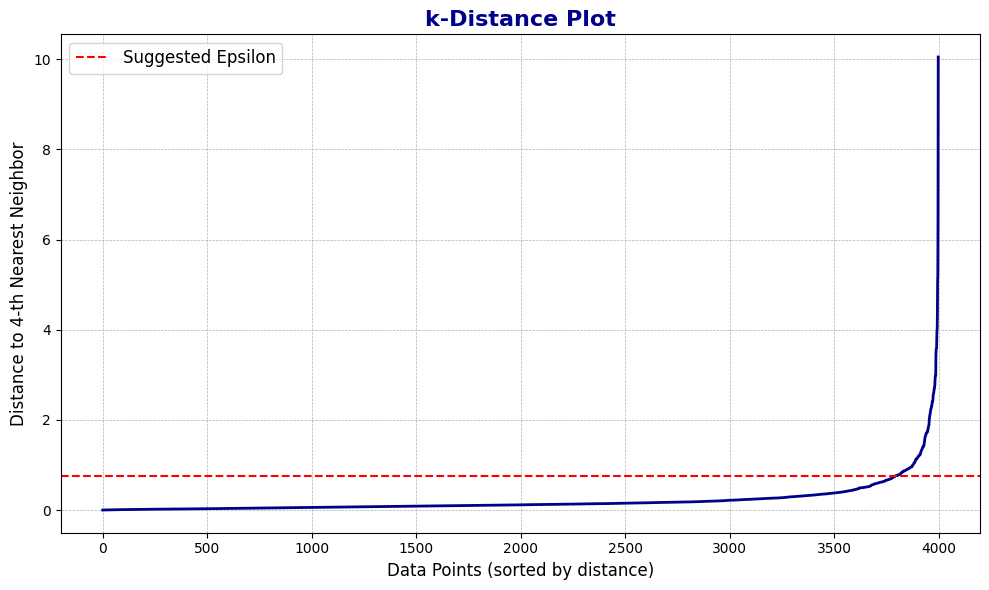

In [21]:
k = 4  
nbrs = NearestNeighbors(n_neighbors=k).fit(pca_scaled)
distances, indices = nbrs.kneighbors(pca_scaled)

k_distances = np.sort(distances[:, k - 1])

plt.figure(figsize=(10, 6))
plt.plot(k_distances, color='darkblue', linewidth=2)
plt.axhline(y=k_distances[int(len(k_distances) * 0.95)], color='red', linestyle='--', linewidth=1.5, label='Suggested Epsilon')
plt.title("k-Distance Plot", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Data Points (sorted by distance)", fontsize=12)
plt.ylabel(f"Distance to {k}-th Nearest Neighbor", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

- Suggested epsilon have the range of (0,1)

### Finding best epsilon and min_samples

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [25]:
eps_values = np.arange(0.1, 1.0, 0.1)  
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best Params: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best Silhouette Score: {best_score}")

Best Params: eps=0.9, min_samples=10
Best Silhouette Score: 0.6522517579971983


- Best parameters after hyper parameter tuning are, epislion = 0.9, min_samples = 10

### Model Training

In [26]:
eps = 0.9
min_samples = 10

# Step 1: Train the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
df['Cluster'] = clusters

### Evaluation

In [27]:
from sklearn.metrics import silhouette_score 

In [28]:
silhouette_score(df,clusters)

np.float64(0.6562363241816314)

### Pair Plot

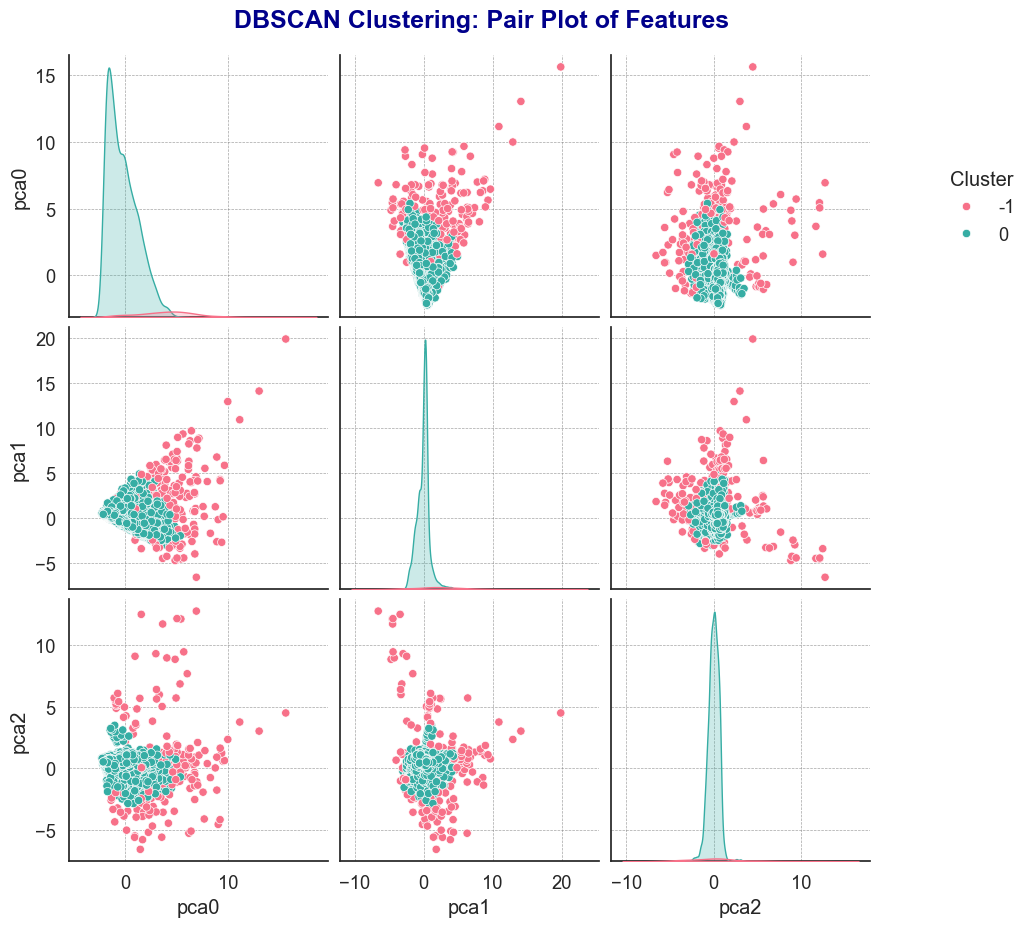

In [29]:
sns.set_theme(style="white", context="notebook", font_scale=1.2)
custom_palette = sns.color_palette("husl", n_colors=len(df['Cluster'].unique()))  # Distinct, vibrant colors

pair_plot = sns.pairplot(df, 
                         hue="Cluster", 
                         palette=custom_palette, 
                         diag_kind="kde", 
                         height=3,  
                         markers=["o"])  

pair_plot.fig.suptitle("DBSCAN Clustering: Pair Plot of Features", 
                       fontsize=18, fontweight='bold', color="darkblue", y=1.03)

pair_plot._legend.set_bbox_to_anchor((1.05, 0.8))  
pair_plot._legend.get_frame().set_edgecolor("black")  
pair_plot._legend.get_frame().set_linewidth(1)

for ax in pair_plot.axes.flat:
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

pair_plot.savefig("enhanced_pair_plot_dbscan.png", dpi=300, bbox_inches='tight')

plt.show()


### **DBSCAN Clustering Analysis**
- **Clusters**: DBSCAN identified **2 clusters**:
   - Cluster `0` (teal points): Dense regions where the majority of the points lie.
   - Cluster `-1` (red points): Outliers or noise points.
- **Distribution**:
   - DBSCAN highlights **outliers** effectively (Cluster `-1`).
   - Dense clusters (Cluster `0`) are clearly separated from the noise.
- **Observations**:
   - Unlike K-Means, DBSCAN does not assume spherical clusters and can detect arbitrarily shaped clusters.
   - Noise points are spread across all PCA dimensions, indicating they do not belong to any dense region.
- **Insights**:
   - DBSCAN is better suited for datasets with **noise** and **non-spherical clusters**.
   - The single dense cluster (`0`) indicates that most data points belong to a single core structure.
   - Outliers are more pronounced and can be analyzed separately.

---